# Gradient Descent Algorithm - Student Admission draft

In [1]:
#Import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines
def plot_points(X, y):
    s1 = X[y==1]
    s2 = X[y==0]
    plt.scatter(s1[:,0], s1[:,1], color = 'red', edgecolor = 'k')
    plt.scatter(s2[:,0], s2[:,1], color = 'blue', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.01)
    plt.plot(x, m*x+b, color)

## Load and visualize the data

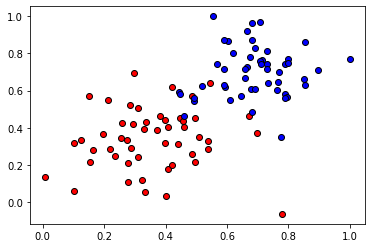

In [2]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X, y)
plt.show()

In [3]:
# Helper function

# Activation (sigmoid) function
def sigmoid(x):
    result = 1/(1+np.exp(-x))
    return result

# Output (prediction) formula
def output_formula(features, weights, bias):
    X=features
    W=weights
    b=bias
    yhat =sigmoid(np.dot(X,W) + b)
    return yhat

# Error (log-loss) formula
def error_formula(y, output):
    yhat = output        
    error = -y*np.log(yhat) - (1-y)*np.log(1-yhat)
    return error

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    yhat=output_formula(x,weights,bias)
    weights = weights + (learnrate*(y-yhat)*x)
    bias = bias + (learnrate*(y-yhat))
    return weights,bias

## Train the model

In [4]:
np.random.seed(44)
def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


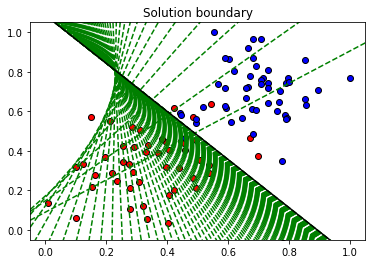

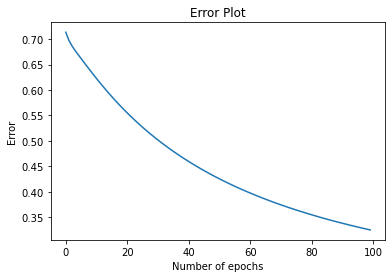

In [5]:
epochs = 100
learnrate = 0.01
train(X, y, epochs, learnrate, True)